In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [69]:
data = pd.read_excel('E-commerce_data.xlsx')

In [71]:
features = data[['gender_id', 'city_id']]

In [73]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['city_id']),
        ('cat', OneHotEncoder(), ['gender_id']),
    ]
)

In [75]:
def kmeans_clustering(data, preprocessor, max_clusters):
    inertias = []
    silhouette_scores = []
    
    for n_clusters in range(2, max_clusters + 1):
        # Create a Pipeline for the current number of clusters
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('kmeans', KMeans(n_clusters=n_clusters, random_state=0))
        ])
        pipeline.fit(data)
        
       
        labels = pipeline.predict(data)
        inertia = pipeline.named_steps['kmeans'].inertia_
        silhouette_avg = silhouette_score(data, labels)
        
        inertias.append(inertia)
        silhouette_scores.append(silhouette_avg)
        
        print(f'Clusters: {n_clusters}, Inertia: {inertia:.2f}, Silhouette Score: {silhouette_avg:.2f}')
    
    return inertias, silhouette_scores


In [77]:
max_clusters = 10
inertias, silhouette_scores = kmeans_clustering(features, preprocessor, max_clusters)


C:\Users\Amr Hussein\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Amr Hussein\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Clusters: 2, Inertia: 734.90, Silhouette Score: 0.63
Clusters: 3, Inertia: 474.60, Silhouette Score: 0.33


C:\Users\Amr Hussein\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Amr Hussein\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Clusters: 4, Inertia: 234.42, Silhouette Score: 0.08
Clusters: 5, Inertia: 172.87, Silhouette Score: 0.09


C:\Users\Amr Hussein\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Amr Hussein\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Clusters: 6, Inertia: 108.62, Silhouette Score: 0.14
Clusters: 7, Inertia: 85.11, Silhouette Score: 0.14


C:\Users\Amr Hussein\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Amr Hussein\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Clusters: 8, Inertia: 60.72, Silhouette Score: 0.20
Clusters: 9, Inertia: 51.26, Silhouette Score: 0.22
Clusters: 10, Inertia: 42.00, Silhouette Score: 0.25


C:\Users\Amr Hussein\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [79]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Inertia')

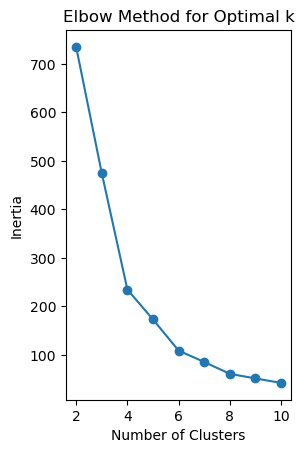

In [81]:
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

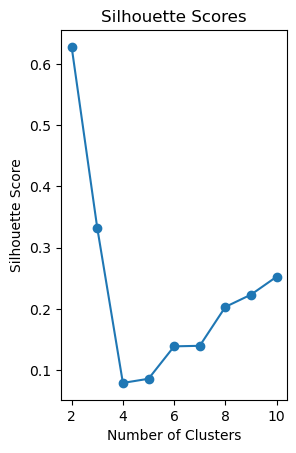

In [83]:
# Silhouette Scores Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [85]:
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=optimal_clusters, random_state=0))
])
final_pipeline.fit(features)
data['cluster'] = final_pipeline.predict(features)

# Analyze each segment
segment_analysis = data.groupby('cluster').agg({
    'customer_id': 'count',
    'gender_id': 'mean',  
    'city_id': 'mean',
}).rename(columns={'customer_id': 'count'})
print(segment_analysis)

         count  gender_id    city_id
cluster                             
0          501   1.457086   5.000000
1          499   1.525050  15.292585


C:\Users\Amr Hussein\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
